Optimal tour: [157, 106, 520, 523, 754, 886, 606, 254, 628, 965, 549, 67, 457, 125, 814, 799, 914, 798, 921, 854, 489, 677, 906, 195, 31, 178, 171, 43, 95, 269, 47, 704, 686, 648, 967, 426, 973, 307, 464, 363, 281, 680, 258, 285, 738, 512, 58, 369, 367, 646, 685, 159, 588, 666, 63, 313, 451, 917, 658, 386, 170, 643, 662, 383, 990, 272, 459, 227, 941, 431, 587, 613, 872, 937, 676, 339, 155, 153, 602, 90, 529, 353, 221, 671, 978, 663, 970, 479, 156, 771, 413, 454, 491, 709, 498, 894, 631, 250, 567, 111, 614, 151, 29, 78, 271, 974, 186, 141, 474, 364, 347, 235, 20, 304, 316, 296, 515, 49, 128, 297, 450, 775, 415, 249, 536, 288, 359, 642, 154, 836, 884, 198, 493, 736, 36, 737, 584, 616, 749, 308, 534, 81, 212, 86, 809, 449, 959, 284, 321, 976, 180, 298, 659, 621, 777, 957, 468, 568, 35, 318, 189, 168, 683, 544, 135, 779, 299, 192, 93, 517, 807, 590, 735, 117, 871, 744, 397, 847, 247, 218, 245, 582, 432, 236, 158, 880, 597, 618, 794, 161, 140, 579, 873, 612, 713, 305, 966, 781, 138, 644, 49

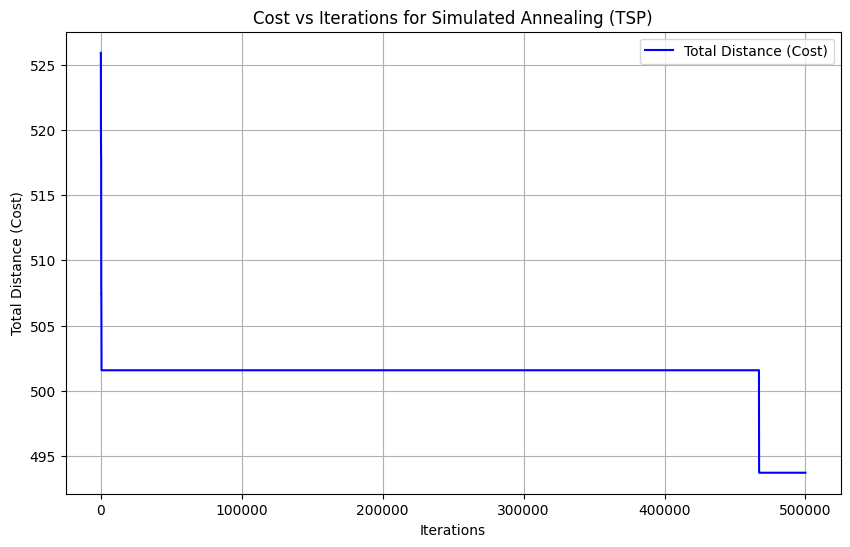

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

n = 1000
pts = np.random.rand(2, n)

dist_mat = np.zeros((n, n))
for i in range(n - 1):
    for j in range(i + 1, n):
        dist_mat[i, j] = np.linalg.norm(pts[:, i] - pts[:, j])
        dist_mat[j, i] = dist_mat[i, j]

def calc_dist(tour_seq, dist_mat):
    return sum(dist_mat[tour_seq[i], tour_seq[i + 1]] for i in range(len(tour_seq) - 1)) + dist_mat[tour_seq[-1], tour_seq[0]]

def sim_anneal_tsp(n, dist_mat, init_temp=1000, max_iter=500000):
    curr_tour = list(range(n))
    random.shuffle(curr_tour)

    best_tour = curr_tour[:]
    best_dist = calc_dist(best_tour, dist_mat)

    cost_hist = []

    for iter in range(1, max_iter + 1):
        ids = random.sample(range(n), 2)
        ids.sort()

        new_tour = curr_tour[:]
        new_tour[ids[0]:ids[1] + 1] = reversed(curr_tour[ids[0]:ids[1] + 1])

        new_cost = calc_dist(new_tour, dist_mat)

        delta_E = best_dist - new_cost
        temp = init_temp / iter

        if delta_E > 0:
            p_accept = 1
        elif temp <= 0:
            p_accept = 0
        else:
            if delta_E / temp > 500:
                p_accept = 0
            elif delta_E / temp < -500:
                p_accept = 1
            else:
                p_accept = 1 / (1 + math.exp(-delta_E / temp))

        if delta_E > 0 or random.random() < p_accept:
            curr_tour = new_tour
            if new_cost < best_dist:
                best_tour = curr_tour
                best_dist = new_cost

        cost_hist.append(best_dist)

    return best_tour, best_dist, cost_hist

final_tour, final_dist, cost_hist = sim_anneal_tsp(n, dist_mat)

print("Optimal tour:", final_tour)
print("Optimal distance:", final_dist)

plt.figure(figsize=(10, 6))
plt.plot(cost_hist, label='Total Distance (Cost)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Total Distance (Cost)')
plt.title('Cost vs Iterations for Simulated Annealing (TSP)')
plt.grid(True)
plt.legend()
plt.show()